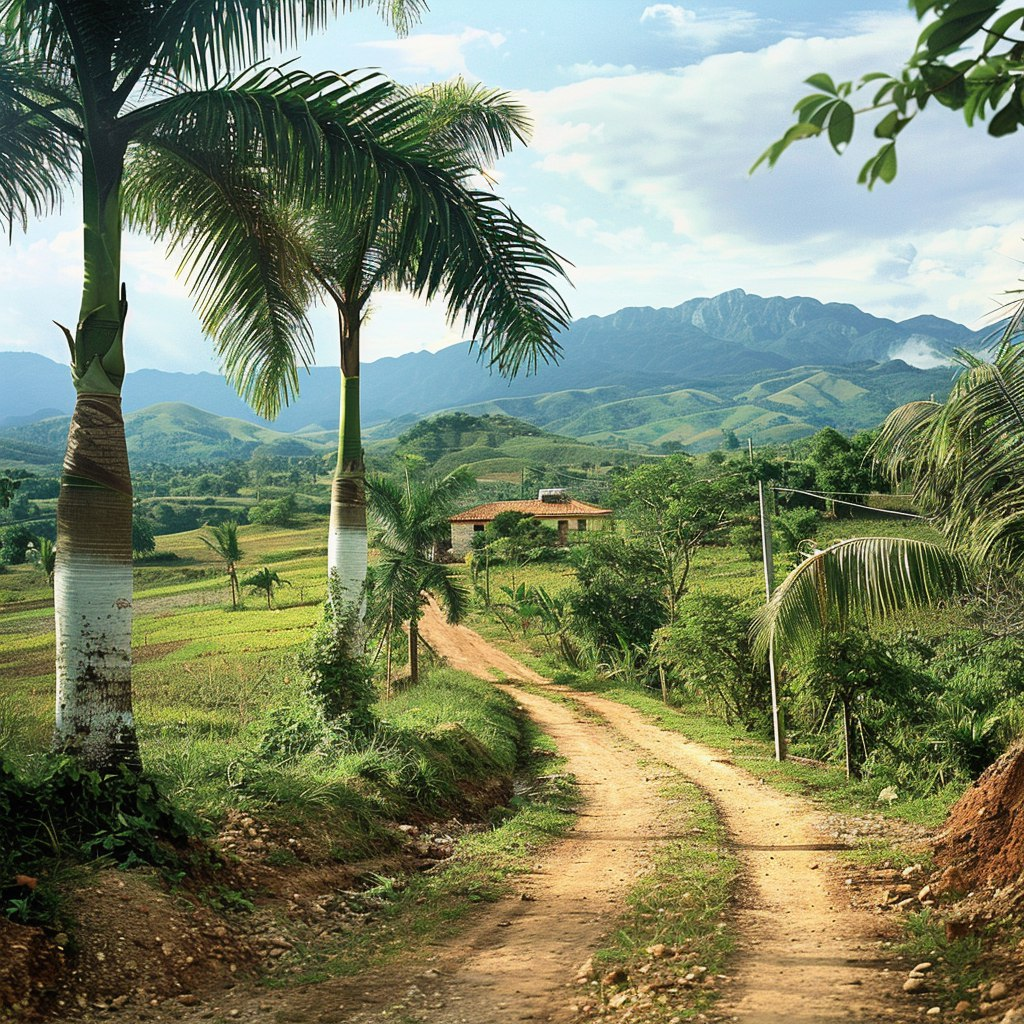

----------

######  Simulación de un pueblo de Granma (generada con IA).

#    "Raíces en Tierras Lejanas"


En un pequeño pueblo en la provincia de Granma, dos amigos de la infancia, Juan y Juliana, crecieron entre los extensos campos de boniato y los frondosos árboles de mango. A medida que crecían, surgieron en ellos sueños de explorar nuevas oportunidades en un lugar diferente, un destino que vieron en la bulliciosa capital de Cuba, La Habana.
Impulsados por su ambición y sed de descubrimiento, Juan y Juliana decidieron emprender el viaje en busca de un futuro diferente; dejaron atrás los cultivos familiares, las risas compartidas en la sombra de los árboles de mango y los atardeceres sobre los campos de caña. Después de un largo viaje, finalmente llegaron a La Habana. Allí, se encontraron con un mundo completamente nuevo y emocionante, lleno de oportunidades y posibilidades. 

En esta breve historia se evidencia la emigración; desplazamiento de personas con el fin de establecerse de manera semipermanente o definitiva en otro lugar, motivado por diversas razones, ya sea como las de Juan y Juliana, en búsqueda de nuevas oportunidades, o por situaciones sociales, políticas e incluso ideológicas.





 

In [3]:
#importar las bibliotecas
import plotly.express as px
import json 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#cargar los datos de json
with open ('datos.json','r')as gr:
    dt = gr.read()
granma = json.loads(dt)

##### función que se utilizó #####

#función para llenar listas con los datos del Json 
def llenar_lista(filtro1:str, filtro2:str, lista1:list)->list:
    lista = []
    for keys,values in granma.items(): #itero el diccionario
        if keys == filtro1: #si la clave del diccionario inicial es igual al primer filtro
            for clave,valor in values.items(): # itero el segundo diccionario2
                if clave in lista1: # si las claves están en la lista1 enviada por parametro
                     for key,value in valor.items():# itero el diccionario3 del valor de las claves que esten en la lista1
                            if key == filtro2: # si la clave de diccionario3 es igual al ultimo filtro2
                                lista.extend(value) #agrego a la lista las lista de listas
              
    return lista



#### ¿Cuántas personas han tomado decisiones similares o iguales a la de Juan y Juliana?

Durante años, numerosas personas se han trasladado a otras provincias. Antes de la división política administrativa (DPA) de 2011, Ciudad de La Habana era la capital y registró la mayor cantidad de migrantes granmences en 2008 y 2010, con 1684 y 1839 respectivamente. Tras la DPA, se incluyen Artemisa y Mayabeque como provincias y desaparece la Ciudad de La Habana. Al pasar a ser la capital del país, La Habana se convierte rápidamente en el principal destino de la mayoría de las personas, por lo que no es sorprendente que fuera la provincia líder en cifras a partir de entonces, con 2692 en 2016 y un total de 3314 personas en 2022, alcanzando sus números más altos. Matanzas, Mayabeque, y Artemisa también alcanzan cifras significativas, manteniendo un ritmo de emigrantes relativamente constante en los distintos años. 
En lugares como Guantánamo, Pinar del Río y la Isla de la Juventud, hay un número muy reducido de migrantes de Granma. Guantánamo se encuentra en el extremo oriental de Cuba, mientras que Pinar del Río está en el extremo occidental. Se llega a la conclusión de que la mayoría de los migrantes eligen tomar decisiones parecidas a las de Juan y Juliana al dirigirse hacia la capital o sus alrededores (Matanzas, Mayabeque y Artemisa). 

##### ¿Porqué pasará esto?
Es frecuente que los migrantes de un país terminen en la capital, la cual ofrece una mayor cantidad de recursos y más oportunidades laborales, tanto dentro de la ciudad como en el extranjero. Sin embargo, no todos tienen la oportunidad de ir a la capital o prefieren mantenerse en un entorno rural, por lo que eligen vivir en áreas cercanas, lo que les asegura un viaje más corto para obtener productos esenciales y también acceso a empleo o educación, especialmente en carreras universitarias que solo se ofrecen en La Habana, como es el caso de Ciencia de Datos en la región occidental. 

In [13]:
#llamamos a la función llenar_listas 
# con los dos primeros parámetros son los filtros para llenar la lista con los datos del json
# el tercer parametro es una lista de todas las Provincias
provi = llenar_lista("ProvinciasMI","emigracion06-22",granma['Provincias'])

#separar datos de hombres que estan en los indices par
proviH = [y for x,y in enumerate(provi) if x % 2 == 0 ]

#lo llevamos a matriz de numpy
proviH = np.array(proviH)

#separar datos de mujeres que están en indice impar
proviM = [y for x,y in enumerate(provi)if x % 2 != 0]

#lo llevamos a matriz de numpy
proviM = np.array(proviM)

#sumamos los hombres mas las mujeres salientes
sumaH_M = proviM + proviH

#lista de emigrantes hacia granma
to_granma = np.array(granma["toGranma"])
#data frame de emigrantes
df15 = pd.DataFrame(to_granma,index = granma['Provincias'],columns = [x for x in granma['años']if x >= 2006])
#transpuesta
df15 = df15.T

#creamos el dataFrame de Hombres y mujeres de la emigración interna desde el 2006-2022
#se le asigna a los indices las provincias y a las columnas los años del 2006-2022
df = pd.DataFrame(sumaH_M,index = granma["Provincias"],columns = [x for x in granma["años"]if x >= 2006])

#le hacemos la transpuesta
df = df.T

#sacamos las filas del 2009
fila2009emi = df.iloc[[3]]
fila2009inmi = df15.iloc[[3]]

#modificamos las filas del 2009
df.iloc[3] = fila2009inmi
df15.iloc[3] = fila2009emi
print(f'media de emigrantes: {int(df.sum(axis = 1).mean().round())}')
#creamos un gráfico de lineas con plotly
fig = px.line(df,x = df.index,y = df.columns,template = 'seaborn')
#actualizamos la gráfica
fig.update_layout(
    #titulo
    title_text = 'Emigrantes',
    #ubicación del título 
    title_x = 0.4,
    #nombre del eje x e y
    xaxis_title = 'Años',
    yaxis_title = 'Cantidad de emigrantes'
)
fig.show()

media de emigrantes: 7446



De acuerdo con los datos más recientes, se ha calculado que aproximadamente la mitad de los emigrantes de esta provincia son mujeres. Este dato indica un cambio importante en la proporción de género en la población migrante, donde las mujeres representan un papel más destacado. 
La igual representación de mujeres en la migración de Granma muestra que están participando de manera activa en la planificación de su futuro y bienestar, reflejando una realidad social actual.

La media de emigrantes mujeres a lo largo de los años representa un: 50%
La media de emigrantes hombres a lo largo de los años representa un: 50%


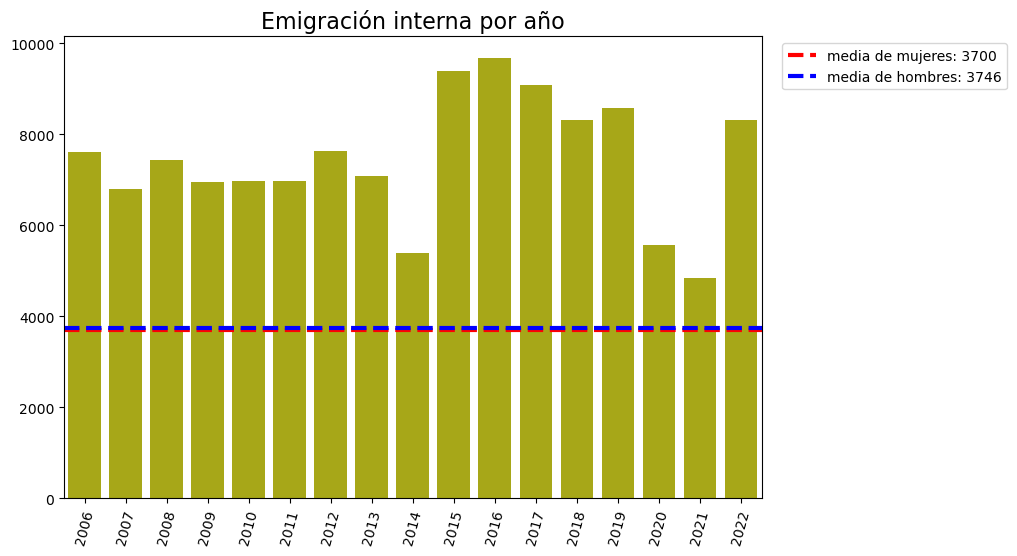

In [5]:
#transpuesta de la matriz de hombres y mujeres
sumaH_M1 = sumaH_M.T.copy()
#sumamos las filas 
total = sumaH_M1.sum(axis = 1)

#transpuesta a la matriz de mujeres
proviMT = proviM.T
#sumar las filas de la matriz transpuesta de mujeres
totalM = proviMT.sum(axis = 1)
#restamos total-total de mujeres y obtenemos el total de los hombres en cada año
totalH = total - totalM
#calcuamos la media de hombres y mujeres
mediaH = round(np.mean(totalH))
mediaM = round(np.mean(totalM))
#media del porciento de mujeres y hombres y después lo redondeo
porcientoM = round(((totalM / total) * 100).mean())
porcientoH = round(((totalH / total) * 100).mean())

print(f"La media de emigrantes mujeres a lo largo de los años representa un: {porcientoM}%")
print(f"La media de emigrantes hombres a lo largo de los años representa un: {porcientoH}%")

#ajustamos el tamaño de la gráfica 
plt.figure(figsize = (9, 6))
sns.barplot(x = [x for x in granma['años']if x >= 2006],y = total, color = 'y')
# Obtener los ejes actuales
ax = plt.gca()
#Configurar el ángulo de rotación en el eje x 
ax.set_xticklabels(ax.get_xticklabels(), rotation = 75)
#añadimos titulo
plt.title('Emigración interna por año', fontsize = 16)
#agregamos las medias al gráfico
plt.axhline(y = mediaM, color = 'r', linestyle = '--', linewidth = 3,label = f"media de mujeres: {mediaM}")
plt.axhline(y = mediaH, color = 'b', linestyle = '--', linewidth = 3,label = f"media de hombres: {mediaH}")

#mostramos la leyenda
plt.legend(bbox_to_anchor = (1.02, 1), loc = 'upper left')
#mostramos el gráfico 
plt.show()

#### ¿Serán cifras importantes?

Granma cuenta con un promedio de 828521 habitantes distribuidos en 12 municipios, con una media de 63732 residentes por municipio. Bayamo, la ciudad principal de la provincia, cuenta con una población promedio de 129251 habitantes, casi el doble de los demás municipios. En cuanto a la representación de las mujeres, conforman el 49%. Por lo tanto, su participación en las migraciones internas no ha afectado a las mujeres en la provincia de Granma, ya que su disminución ha sido solo del 0.90%, una cifra que no se considera relevante. Además, la población total de emigrantes representa un 1% de la población, lo cual tampoco considero un valor significativo.



In [25]:
#lista de residentes hombres y mujeres 2006-2022
poblacionT = llenar_lista("municipios",'residentesH_M_06-22',granma['listamunis'])
#separo los hombres que están en los indice par
listaH = [y for x,y in enumerate(poblacionT) if x % 2 == 0 ]
#separo las mujeres que están en los indice impar
listaM = [y for x,y in enumerate(poblacionT)if x % 2 != 0]
#los llevamos a matrices numpy
listaH = np.array(listaH)
listaM = np.array(listaM)
#total de emigrantes
total1 = total.copy()
#mujeres emigrantes
M = proviM.copy()
#transpuesta y suma de sus filas
M = M.T.sum(axis = 1)
#listas de hombres y mujeres
m = listaM.T.sum(axis = 1)
h = listaH.T.sum(axis = 1)
#Población total
PT = m + h
#promedio de hombres y mujeres
mediaMT = m.mean().round()
mediaHT = h.mean().round()
#porciento de mujeres emigrantes con respecto a la media de mujeres
mujeres_emigrantes_porciento = (M.mean() / mediaMT) * 100
#porciento de emigrantes con respecto al total 
porciento_emigranteT = (total1.mean() / PT.mean()) * 100
print(f"porciento de emigrantes con respecto a la población total: {int(porciento_emigranteT.round())}%")
#crear el data frame
df14 = pd.DataFrame({"Población":[mediaHT,mediaMT,round(M.mean())],
                   "Categoria":['Hombres','Mujeres',"Mujeres Emigrantes"],
                   "Color":["lightblue","pink","red"]})
#gráfico de pastel
fig = px.pie(df14, values = 'Población', 
             names = 'Categoria', 
             color = 'Color', 
             color_discrete_sequence = df14['Color'])

fig.show()


porciento de emigrantes con respecto a la población total: 1%


###### ¿Cómo se comportarán los inmigrantes en comparación con los emigrantes?

la mayor cantidad de inmigrantes que tiene la provincia son provenientes de Santiago de Cuba, pero a lo largo de los años solo ha disminuido, y comparado con los emigrantes son un poco menos de la mitad con 3235 en media.

media de inmigrantes: 3235


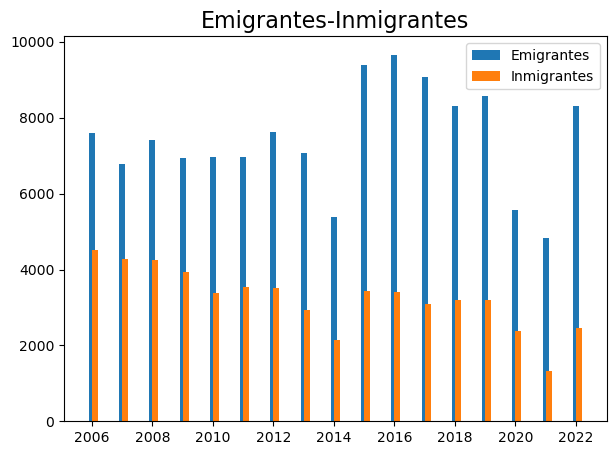

In [8]:
#el data Frame está en el segundo bloque de código. 
print(f'media de inmigrantes: {int(df15.sum(axis = 1).mean().round())}')
fig = px.line(df15,x = df15.index,y = df15.columns,template = 'seaborn')
#actualizamos la gráfica
fig.update_layout(
    #titulo
    title_text = 'Inmigrantes',
    #ubicación del título 
    title_x = 0.4,
    #nombre del eje x e y
    xaxis_title = 'Años',
    yaxis_title = 'Cantidad de emigrantes'
)

fig.show()
compararInmi = df15.sum(axis = 1)
compararEmi = df.sum(axis = 1)

plt.figure(figsize = (7,5))
plt.bar([x for x in granma['años']if x >= 2006],compararEmi, width = 0.20, label = "Emigrantes")
plt.bar([i + 0.10 for i in [x for x in granma['años']if x >= 2006]],compararInmi,width = 0.20,label = "Inmigrantes")
#añadir leyenda
plt.legend(loc = 'best')
#añadimos titulo
plt.title('Emigrantes-Inmigrantes', fontsize = 16)
plt.gca()
plt.show()

#### ¿ La población disminuirá?

Durante el período comprendido entre los años 2008 y 2012, la población experimentó un notable aumento en su tasa de crecimiento. Este incremento en el número de habitantes puede haber sido resultado de diversos factores:
1. Natalidad: El número de nacimientos por cada 1,000 personas en una población, puede influir significativamente en la tasa de crecimiento. Un aumento en la tasa de natalidad puede llevar a un crecimiento poblacional más rápido, mientras que una disminución puede resultar en una tasa de crecimiento más lenta.

2. Mortalidad: La tasa de mortalidad, que se refiere al número de muertes por cada 1,000 personas en una población, también juega un papel importante en la tasa de crecimiento. Una alta tasa de mortalidad puede reducir el crecimiento poblacional, mientras que una baja tasa puede impulsar el crecimiento.

3. Migración: es un proceso de desplazamiento, ya sea a través de una frontera internacional o dentro de un mismo país, que comprende cualquier tipo de movimiento de las personas, independientemente de las causas.

4. Factores socioeconómicos: La disponibilidad de empleo, acceso a servicios de salud, educación y vivienda, así como la estabilidad política y económica de un país, también pueden impactar en la tasa de crecimiento de la población.

En 2012, la población llegó a su nivel más alto en cuanto a la velocidad de crecimiento. Este acontecimiento fue un pico importante en el cambio demográfico de la zona, ya que a partir de ese momento, la tasa de crecimiento empezó a reducirse progresivamente, esto puede estar vinculado con que en esos años la tasa de natalidad aumentó y luego empezó a disminuir, sin embargo la tasa de mortalidad no ha parado de aumentar y llegó en 2021 a alcanzar mayor mortalidad qué natalidad en todos los años con un 15.1 por cada 1000 habitantes.

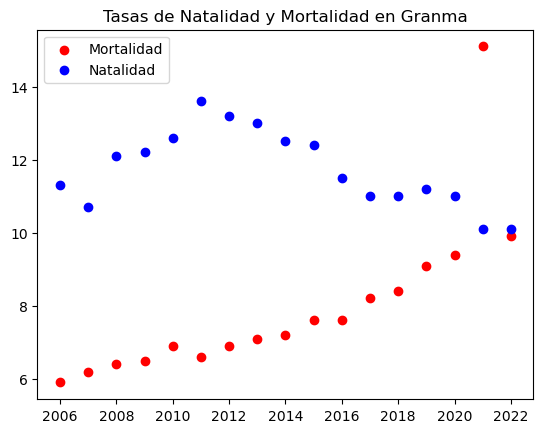

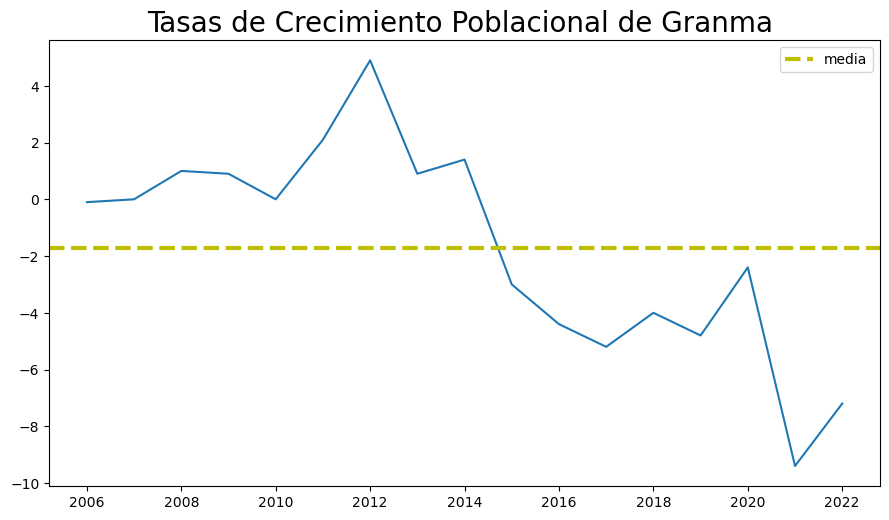

In [9]:
#tasa de crecimiento poblacional
tc = granma['tasaCrecimiento']
#tasas de natalidad y mortalidad
mortalidad = granma['mortalidad']
natalidad = granma['natalidad']
tcm = np.array(tc.copy()).mean()

#gráfico de puntos de la natalidad y mortalidad
plt.scatter([x for x in granma['años']if x >= 2006],mortalidad,color = 'red',label = "Mortalidad")
plt.scatter([x for x in granma['años']if x >= 2006],natalidad,color = 'blue',label = 'Natalidad')
plt.title("Tasas de Natalidad y Mortalidad en Granma")
plt.legend(loc = "best")
plt.show()

#tamaño del gráfico de lineas
fig = plt.subplots(figsize = (9,5))
plt.plot([x for x in granma['años']if x >= 2006],tc)
plt.tight_layout()
plt.axhline(y = tcm, color = 'y', linestyle = '--', linewidth = 3,label = "media")
plt.title("Tasas de Crecimiento Poblacional de Granma ",fontsize = 20)
plt.legend()
plt.show()


#### ¿Será solo en Granma?¿Qué ocurre en las provincias cercanas? 

En Granma, la migración ha sido afectada por diferentes razones como la falta de dinero, las reglas políticas y la búsqueda de una vida mejor. Esta misma tendencia ha sido observada en otras provincias del este de Cuba, donde la emigración también ha sido un fenómeno habitual. 

Un análisis de las tasas de emigración de Granma en comparación con otras provincias orientales de Cuba muestra que Guantánamo tiene la tasa más baja con un promedio de -7.8, seguido de Granma con -5.07 y Las Tunas con -2.85. Una situación de migración negativa implica que hay más personas saliendo de la provincia que ingresando. Esto señala que el deseo de emigrar no está limitado a Granma, también se observa en las provincias cercanas. En el caso específico de Granma, al analizar los promedios anuales de emigrantes (que no son muy altos), los inmigrantes y las tasas de emigración negativa, se puede concluir que la provincia ha sufrido una disminución de población. Con la suposición de que en los años venideros la población continúe reduciéndose lentamente.

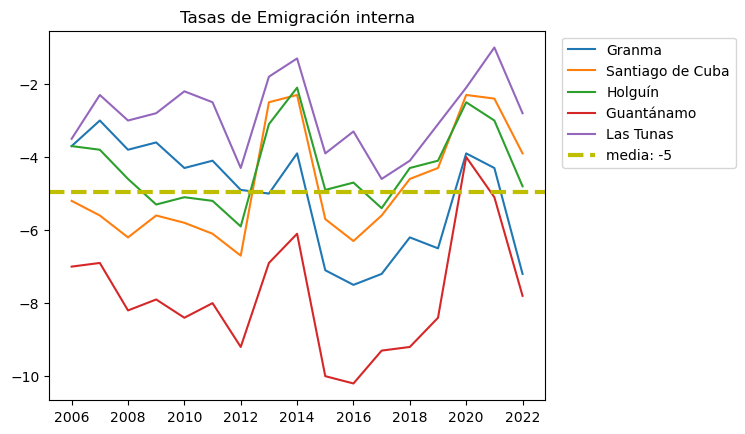

In [26]:
#listas de las tasas de emigración interna de las provincias orientales 
tmiGr = np.array(granma['TMI_general'])#Granma
tmiLT = np.array(granma['ProvinciasMI']["Las Tunas"]['tmi'])#Las Tunas
tmiH = np.array(granma['ProvinciasMI']['Holguín']['tmi'])#Holguín
tmiS = np.array(granma['ProvinciasMI']['Santiago de Cuba']['tmi'])#Santiago de Cuba
tmiG = np.array(granma['ProvinciasMI']['Guantánamo']['tmi'])#Guantánamo 
#promedios
proGs = tmiG.mean()
proH = tmiH.mean()
proLTs = tmiLT.mean()
proS = tmiS.mean()
proGR = tmiGr.mean()
sumaMed=(proGs + proH + proLTs + proS + proGR) / 5

#Crear gráfico de líneas con los 5 provincias
sns.lineplot(x = [x for x in granma['años']if x >= 2006], y = tmiGr, label = 'Granma')
sns.lineplot(x = [x for x in granma['años']if x >= 2006], y = tmiS,  label = 'Santiago de Cuba')
sns.lineplot(x = [x for x in granma['años']if x >= 2006], y = tmiH,  label = 'Holguín')
sns.lineplot(x = [x for x in granma['años']if x >= 2006], y = tmiG,  label = 'Guantánamo ')
sns.lineplot(x = [x for x in granma['años']if x >= 2006], y = tmiLT, label = 'Las Tunas')
#título
plt.title("Tasas de Emigración interna")
#añadimos media
plt.axhline(y = sumaMed, color = 'y', linestyle = '--', linewidth = 3,label = f"media: {round(sumaMed)}")
plt.legend(bbox_to_anchor = (1.02, 1), loc = 'upper left')
plt.show()

El resultado de realizar una encuesta, dónde votaron 57 personas de diferentes provincias con el objetivo de analizar las situaciones que a las que se podría enfrentar un estudiante de otras provincias en la capital y si al terminar sus estudios regresaria a su provincia. Desfavorablemente de los 57 votantes, solo uno fue de Granma.

In [101]:
#abrir el csv de las encuestas
csv = pd.read_csv('/Users/enrique.marichal/Desktop/ALbertICD/Survey/26380b50-f3a3-11ee-856a-85cb16c01ab6.csv')
csv['Por favor indique su provincia de nacimiento'].value_counts()


Por favor indique su provincia de nacimiento
La Habana              22
Matanzas                7
Pinar del Río           4
Villa Clara             3
Mayabeque               3
Santigo de Cuba (1)     2
Las Tunas               2
Holguín                 2
Las Tunas (1)           2
Guantánamo (1)          2
Villa Clara (1)         1
Sancti Spiritus (1)     1
Camagüey (1)            1
Cienfuegos (1)          1
Ciego de Ávila (1)      1
Artemisa                1
Sancti Spiritus         1
Granma                  1
Name: count, dtype: int64

###### ¿Qué piensan los estudiantes de regresarar a sus provincias?
con un 60% de votos válidos en la encuesta, el "No" con 23 votos a favor superó al "Si" qué solo obtuvo 11 votos. A raíz de este resultado intuyo que la mayoria de los estudiantes que deciden emigrar, no tienen intención de regresar a su provincia

votos válidos en esta pregunta: 60%


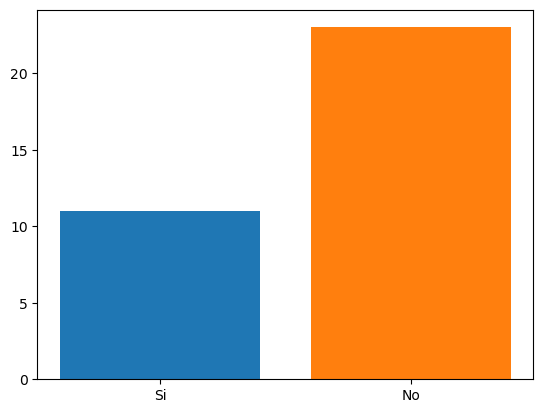

In [71]:
#se saca la columna de la pregunta de retornar a su provincia y se ingnora todos los qué no votaron (NaN)
s = csv['¿Tiene la intención de retornar a su provincia una vez que haya concluido sus estudios? Si es de La Habana, puede ignorar esta pregunta.'].dropna()
#crear una lista para los "si" y los "NO"
listaSi = [x for x in s if x == "Yes"]
listaNo = [x for x in s if x == "No"]
total_si_no = len(listaSi)+len(listaNo)
print(f"votos válidos en esta pregunta: {round((total_si_no / 57) * 100)}%")
plt.bar("Si",len(listaSi))
plt.bar("No",len(listaNo))
plt.show()

###### ¿Cuál será él o los beneficios de estuidar acá? 
Esta pregunta resulta interesante, ya que al analizar el texto donde de los votantes, obtuve las 20 palabras más repetidas. "mejor, oportunidades, conocer, provincia, estudiar,  mayor, nuevas, mejores, beneficios, provincias, posibilidades, calidad, carreras, tener, muchas, poder, habana, vida, carrera, opciones".

De estas palabras se pueden formar frases como "mejores oportunidades", "mejor calidad de vida", "conocer nuevas provincias", "nueva vida" entre otras, y pueden que estas frases sean la respuesta que buscamos.

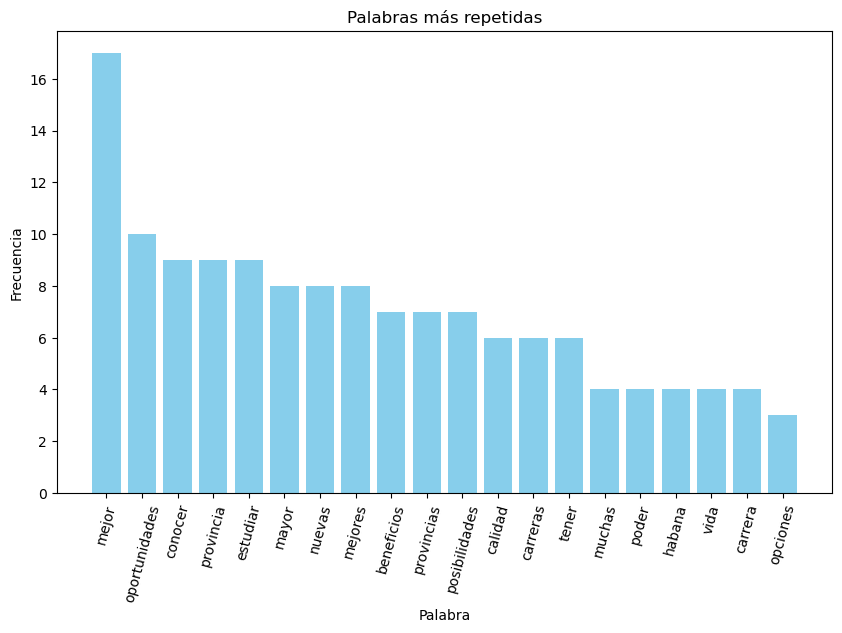

In [108]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.probability import FreqDist

#descargar los stopwords, solo se hace la primera vez.
#import nltk
#nltk.download('stopwords')

def palabras_repetidas(columna_texto):
    #a la columna le quitamos las filas NaN y unimos todo en un string separados por espacios
    texto_completo = ' '.join(columna_texto.dropna())

    # Tokenizar el texto en palabras
    palabras = texto_completo.split()

    # Calcular la frecuencia de cada palabra
    frecuencia_palabras = FreqDist(palabras)

    #Filtrar stopwords, signos de puntuación y palabras de longitud menor a 3
    stop_words = set(stopwords.words('spanish'))
    filtered_words = [word.lower() for word in palabras if word.isalnum() 
                      and word.lower() not in stop_words and len(word) > 2]

    # Calcular la frecuencia de cada palabra
    frecuencia_palabras = FreqDist(filtered_words)

    # Obtener las 10 palabras más comunes en una lista de tuplas (palabras,frecuencia)
    palabras_comunes = frecuencia_palabras.most_common(20)
    return palabras_comunes

columna_texto = csv['¿Cuáles cree que son los posibles beneficios que los estudiantes podrían experimentar al optar por continuar sus estudios en otra provincia?']
palabras = palabras_repetidas(columna_texto)
# Graficar las palabras 
fig = plt.figure(figsize = (10, 6))
plt.bar([palabra[0] for palabra in palabras], [palabra[1] for palabra in palabras], color = 'skyblue')
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.title('Palabras más repetidas')
plt.xticks(rotation = 75)
plt.show()



###### ¿ Cúal o cuáles serán las desventajas de estudiar fuera de su provincia?
De igual manera se obtuvo las 20 palabras más repretidas de las posibles desventajas que un estudiante emigrante podría tener y se Llegó a formar frases como "vida lejos de la familia", "problemas de adaptación", entre otras, nos dan una respuesta más concisa de algunas de las desventajas que estudiar lejos conlleva.

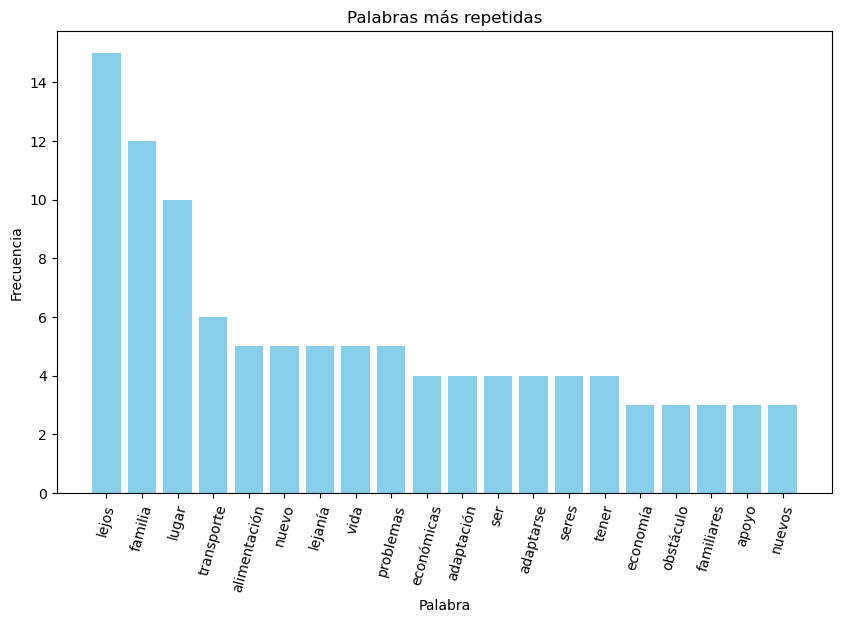

In [111]:
columna = csv['¿Podría mencionar los posibles obstáculos que los estudiantes podrían enfrentar al mudarse a otra región para seguir estudiando?']
p = palabras_repetidas(columna)
fig = plt.figure(figsize = (10, 6))
plt.bar([palabra[0] for palabra in p], [palabra[1] for palabra in p], color = 'skyblue')
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.title('Palabras más repetidas')
plt.xticks(rotation = 75)
plt.show()


#### Metodología 
----
###### Recolección de datos
1. Los datos utilzados fueron extraídos de la Oficina Nacional de Estadísticas e Información (ONEI) http://onei.gob.cu, en los anuarios nacionales, provinciales y en los excel de población.
2. También se utilizó información de la base de datos de https://postdataclub.github.io, que se encuentran en formato json, en específico: https://github.com/postdataclub/postdataclub.github.io/blob/master/issues/201903/data/tasas.json 
3. En Encuesta https://uh2n56ef.forms.app/emigracion sin valor estadístico.

###### Manejo de datos
1. pandas https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html
2. numpy https://numpy.org/doc/
3. nltk https://www.nltk.org


en las tablas del 2009 y el 2017 del documento "3.20-movimiento-migratorio-interno-por-sexos-y-provincias-de-procedencia-y-destino.xls" http://onei.gob.cu/poblacion-0 se encontró que estaban transpuestas.
###### Visualización 
1. matplolib https://matplotlib.org/stable/tutorials/pyplot.html
2. seaborn https://seaborn.pydata.org
3. plotly https://hex.tech/use-cases/data-visualization/?utm_id=h_7015f000000VTMxAAO&utm_source=google&utm_medium=paid%20search&utm_campaign=google_search_nonbrand&utm_content=153592932384&utm_term=python%20visualization%20libraries&gad_source=1&gclid=Cj0KCQjw5cOwBhCiARIsAJ5njubfk7675NVwsbyhfvbiN_QTYJBK13vTL9ps0-KBA1a-vvFJlXLXTe8aAoM5EALw_wcB

